[IPython Notebook](legacy_contact_binary.ipynb) |  [Python Script](legacy_contact_binary.py)

Comparing Contacts Binaries in PHOEBE 2.0 vs PHOEBE Legacy
============================

**NOTE**: PHOEBE 1.0 legacy is an alternate backend and is not installed with PHOEBE 2.0.  In order to run this backend, you'll need to have [PHOEBE 1.0](https://phoebe-project.org/1.0) installed.

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary(contact_binary=True)
#b['q'] = 0.7

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)
/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Adding Datasets and Compute Options
--------------------

In [3]:
b.add_dataset('lc', times=np.linspace(0,1,101), dataset='lc01')
b.add_dataset('rv', times=np.linspace(0,1,101), dataset='rv01')
#b.add_dataset('mesh', times=[0], dataset='mesh01')

<ParameterSet: 16 parameters | contexts: compute, dataset>

Let's add compute options for phoebe using the new (marching) method for creating meshes.

In [4]:
b.add_compute('phoebe', compute='phoebe2', mesh_method='marching')

<ParameterSet: 32 parameters | datasets: lc01, rv01>

Now we add compute options for the 'legacy' backend.

In [5]:
b.add_compute('legacy', compute='phoebe1')

<ParameterSet: 12 parameters | datasets: lc01, rv01>

The 'blackbody' atmospheres from phoebe1 are comperable to the 'extern_planckint' atmospheres in phoebe.

In [6]:
b.set_value_all('atm@phoebe2', 'extern_planckint')
b.set_value_all('atm@phoebe1', 'blackbody')

Set value of gridsize for the trapezoidal (WD) mesh.

In [7]:
b.set_value_all('gridsize', 30)

Let's also disable other special effect such as heating, gravity, and light-time effects.

In [8]:
b.set_value_all('ld_func', 'logarithmic')
b.set_value_all('ld_coeffs', [0.0, 0.0])

b.set_value_all('refl_num',0)
b.set_value_all('rv_grav', False)
b.set_value_all('ltte', False)

Finally, let's compute our models

In [9]:
b.run_compute(compute='phoebe2', model='phoebe2model', irrad_method='none')

<ParameterSet: 6 parameters | kinds: rv, lc>

In [10]:
b.run_compute(compute='phoebe1', model='phoebe1model')

<ParameterSet: 6 parameters | kinds: rv, lc>

Plotting
-------------------------

### Light Curve

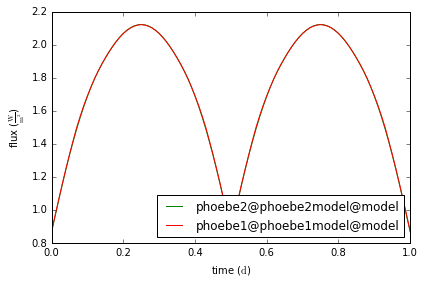

In [11]:
axs, artists = b['lc01@phoebe2model'].plot(color='g')
axs, artists = b['lc01@phoebe1model'].plot(color='r')
leg = plt.legend(loc=4)

Now let's plot the residuals between these two models

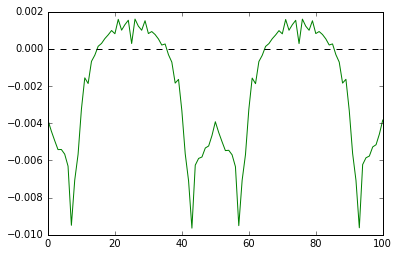

In [12]:
artist, = plt.plot(b.get_value('fluxes@lc01@phoebe2model') - b.get_value('fluxes@lc01@phoebe1model'), 'g-')
artist = plt.axhline(0.0, linestyle='dashed', color='k')

### RVs

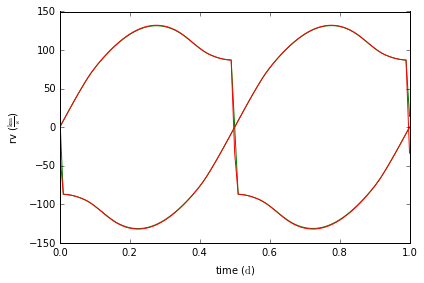

In [13]:
axs, artists = b['rv01@phoebe2model'].plot(color='g')
axs, artists = b['rv01@phoebe1model'].plot(color='r')

ParameterSet: 2 parameters
  times@primary@phoebe2@phoeb...: [ 0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11
  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23
  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33  0.34  0.35
  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45  0.46  0.47
  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59
  0.6   0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.7   0.71
  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81  0.82  0.83
  0.84  0.85  0.86  0.87  0.88  0.89  0.9   0.91  0.92  0.93  0.94  0.95
  0.96  0.97  0.98  0.99  1.  ] d
  rvs@primary@phoebe2@phoebe2...: [  1.40210674e+01  -8.70393851e+01  -8.74168841e+01  -8.80636364e+01
  -8.90588014e+01  -9.03485250e+01  -9.19760667e+01  -9.39292422e+01
  -9.62085465e+01  -9.89889359e+01  -1.02238477e+02  -1.05756794e+02
  -1.09458566e+02  -1.13194247e+02  -1.16800893e+02  -1.20145321e+02
  -1.230831

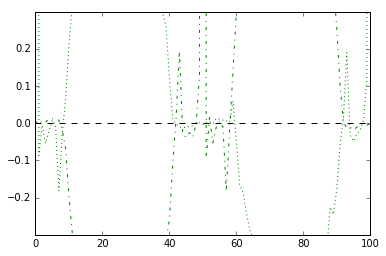

In [14]:
print b['primary@phoebe2model']
artist, = plt.plot(b.get_value('rvs@primary@phoebe2model', ) - b.get_value('rvs@primary@phoebe1model'), color='g', ls=':')
artist, = plt.plot(b.get_value('rvs@secondary@phoebe2model') - b.get_value('rvs@secondary@phoebe1model'), color='g', ls='-.')
artist = plt.axhline(0.0, linestyle='dashed', color='k')
ylim = plt.ylim(-0.3, 0.3)